**Probability and Statistics**

https://docs.scipy.org/doc/scipy/reference/stats.html

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import plotly.graph_objects as go

# Normal distribution

In [21]:
n_samples = 10**4
x_samples = np.random.randn(n_samples)

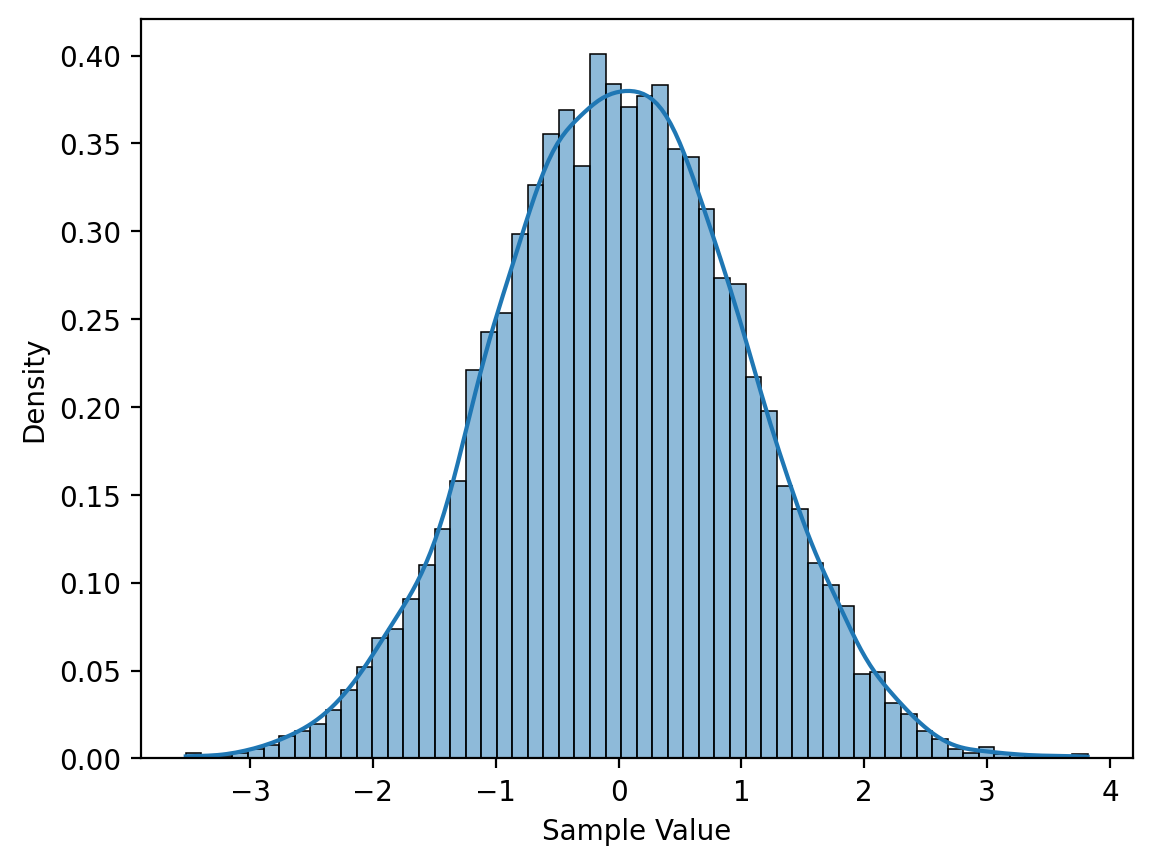

In [22]:
# Plot the histogram of the samples (with seaborn)

fig, ax = plt.subplots()
sns.histplot(x_samples, kde=True, stat="density", ax=ax)
ax.set_xlabel("Sample Value")
ax.set_ylabel("Density")
plt.show()

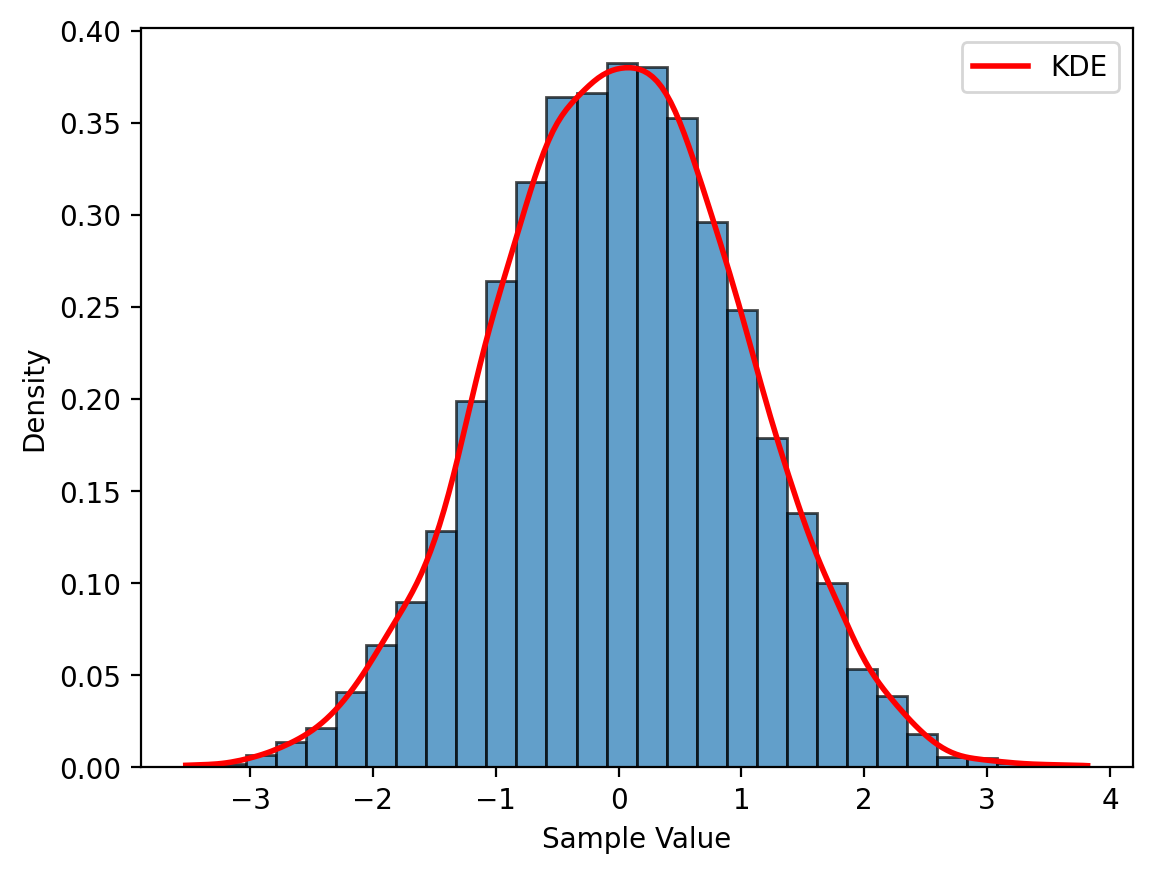

In [23]:
# plot with matplotlib and add KDE curve manually

fig, ax = plt.subplots()
ax.hist(x_samples, bins=30, density=True, alpha=0.7, edgecolor="black")
# Add KDE curve
kde = stats.gaussian_kde(x_samples)
x_range = np.linspace(x_samples.min(), x_samples.max(), 200)
ax.plot(x_range, kde(x_range), "r-", linewidth=2, label="KDE")
ax.set_xlabel("Sample Value")
ax.set_ylabel("Density")
ax.legend()
plt.show()

Plot density function

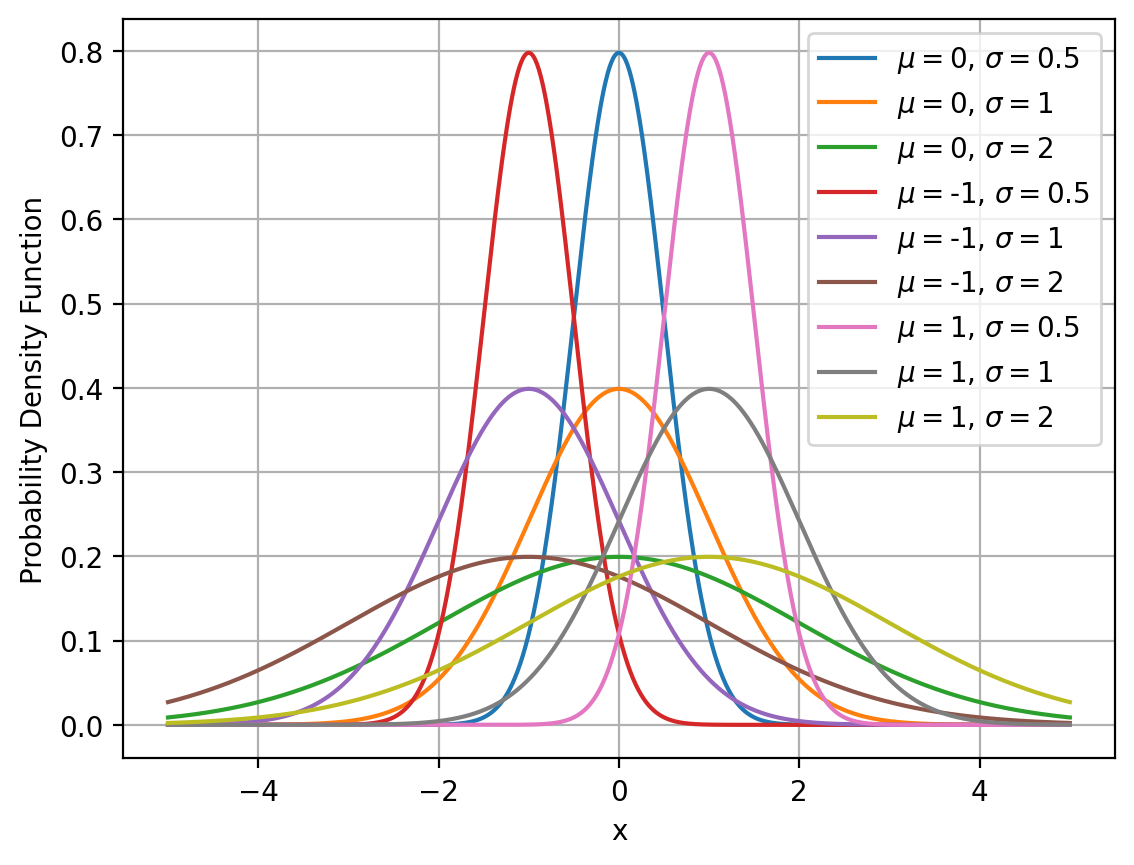

In [24]:
x_range = np.linspace(-5, 5, 1000)
list_mu = [0, -1, 1]
list_sigma = [0.5, 1, 2]

fig, ax = plt.subplots()

for mu in list_mu:
    for sigma in list_sigma:
        x = np.random.normal(loc=mu, scale=sigma, size=n_samples)
        ax.plot(
            x_range,
            stats.norm.pdf(x_range, loc=mu, scale=sigma),
            label=rf"$\mu=${mu}, $\sigma=${sigma}",
        )
ax.set_xlabel("x")
ax.set_ylabel("Probability Density Function")
ax.legend()
ax.grid()
plt.show()

In [28]:
print(stats.norm.fit(x_samples, method="MLE"))
print(stats.norm.fit(x_samples, method="MM"))

(np.float64(0.0033724785728674505), np.float64(1.0067537773394462))
(np.float64(0.0033724785728674505), np.float64(1.0067537773394462))


3D plot: multivariate_normal density with plotly

In [ ]:
# mean and covariance
mu = np.array([0, 0])
sigma = np.array(
    [
        [1, -0.6],
        [-0.6, 1],
    ]
)

# create a grid of points
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# calculate PDF values
rv = stats.multivariate_normal(mu, sigma)
Z = rv.pdf(pos)

# create the plotly surface plot
fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale="viridis")])

fig.update_layout(
    title="Multivariate Gaussian PDF",
    scene={"xaxis_title": "X Axis", "yaxis_title": "Y Axis", "zaxis_title": "Density"},
    autosize=False,
    width=800,
    height=700,
    margin={"l": 65, "r": 50, "b": 65, "t": 90},
)

fig.show()

with matplotlib

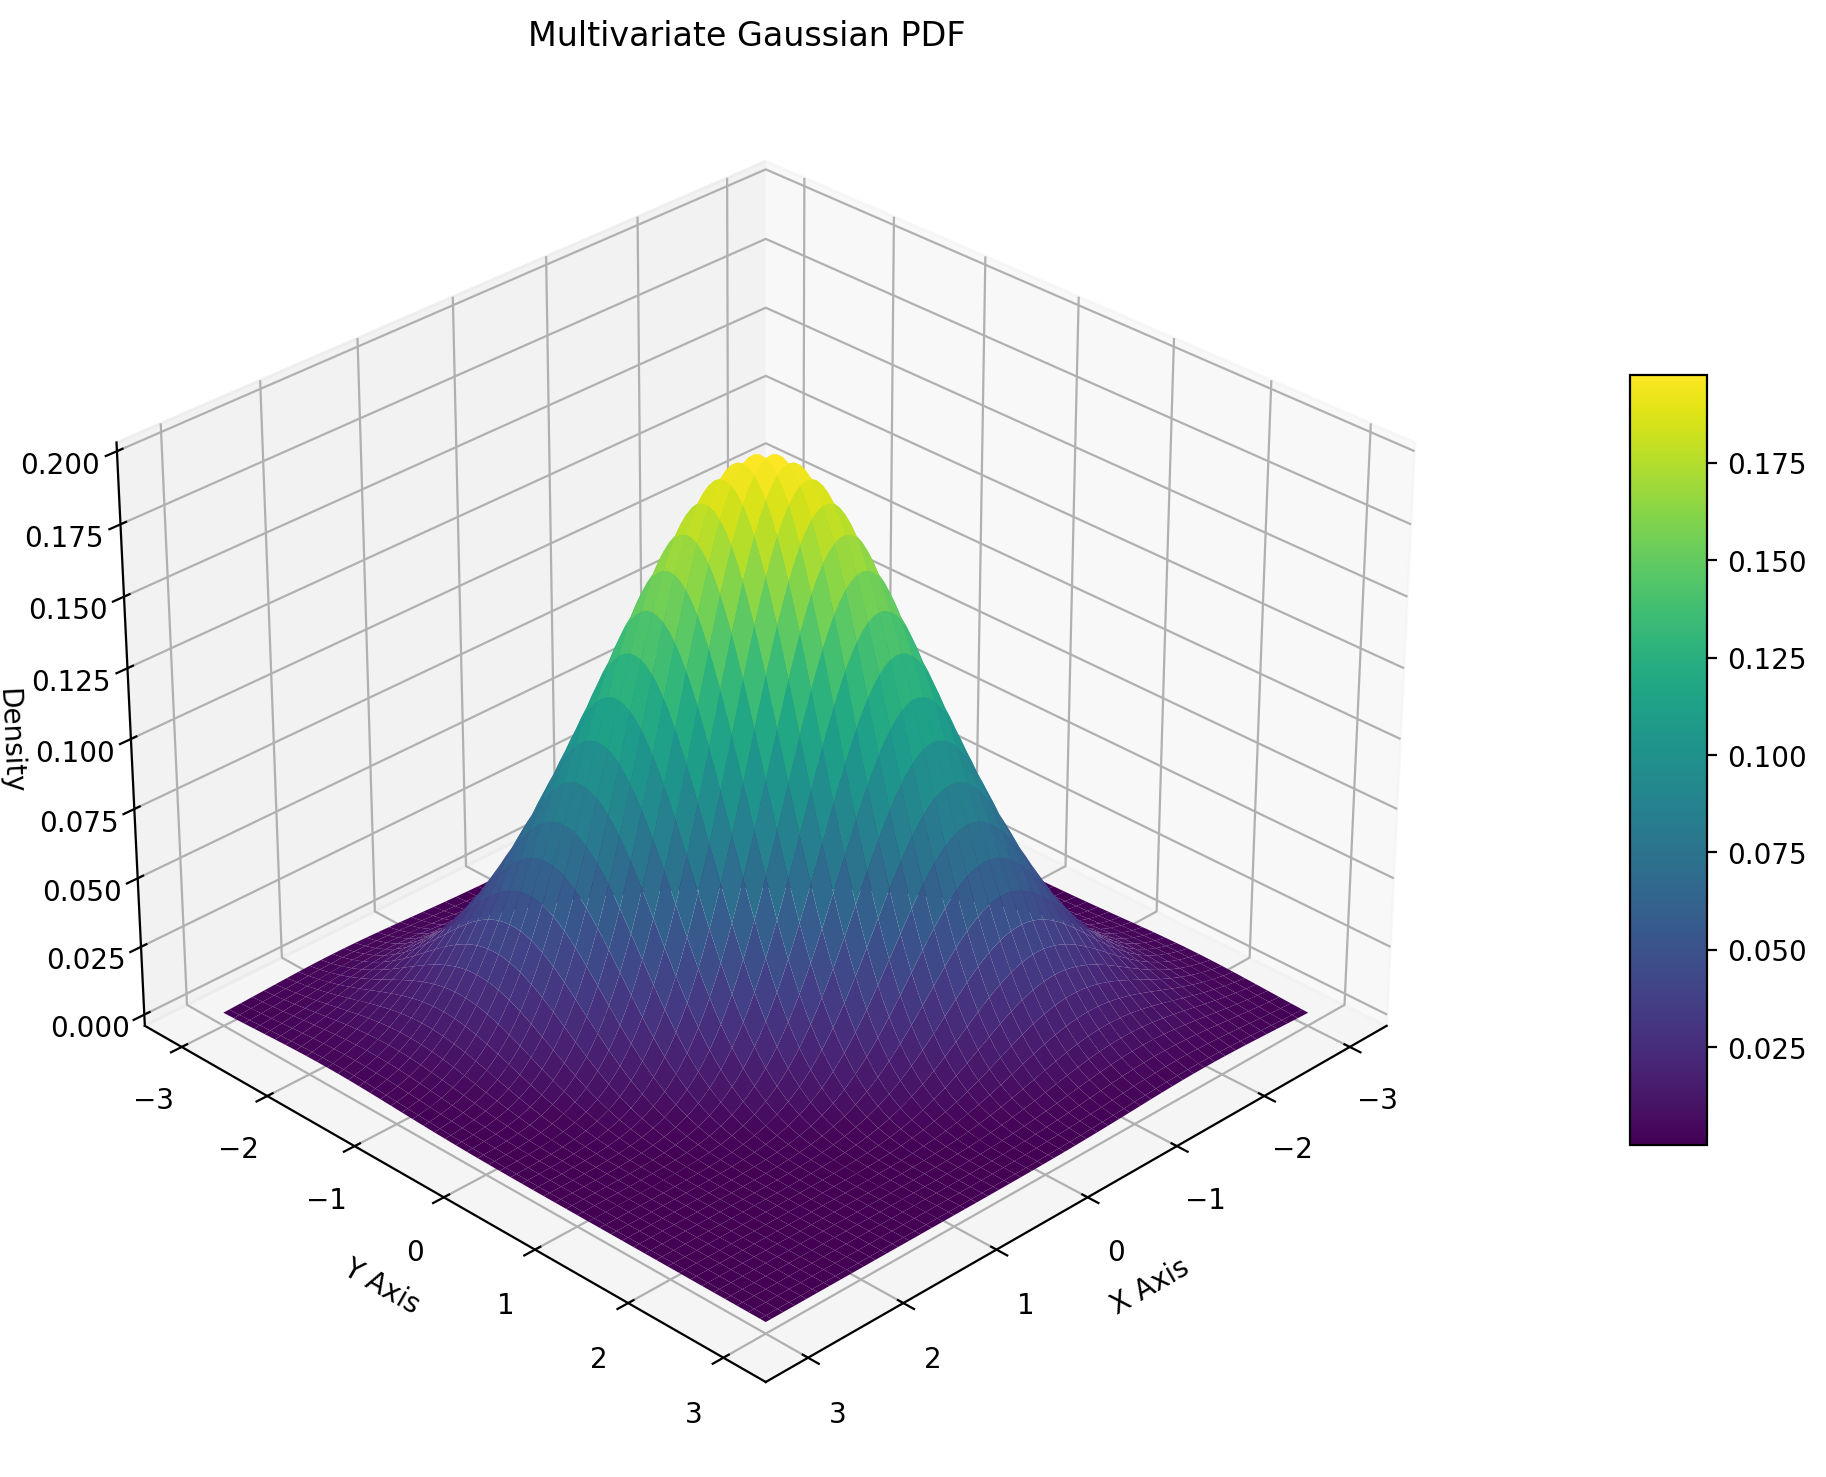

In [40]:
# 1. Define Mean and Covariance (Negative correlation)
mu = np.array([0, 0])
sigma = np.array(
    [
        [1, -0.6],
        [-0.6, 1],
    ]
)

# 2. Create a grid of points
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# 3. Calculate PDF values
rv = stats.multivariate_normal(mu, sigma)
Z = rv.pdf(pos)

# 4. Create the Matplotlib Plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(projection="3d")

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap="viridis")

# Add labels and title
ax.set_title("Multivariate Gaussian PDF")
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Density")

# Add a color bar for reference
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, pad=0.1)

# Set initial viewing angle (elev, azim)
ax.view_init(elev=30, azim=45)

plt.show()